<a href="https://colab.research.google.com/github/khadijah-DEV/next-ecommerce/blob/starter/Module_6_summative_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Industry Selection :**

 e-commerce and customer behavior prediction.

Predicting customer churn in an e-commerce platform.

##Business Objective:
Predict whether a customer will churn based on their behavior


## Constraints:
 Limited data for new customers, computational budget for model training


## Evaluation Metrics:

 Accuracy, Precision, Recall, F1-Score


## Data Collection:

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [14]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the uploaded filename
churn = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(churn)

# Display the first few rows
df.head()



Saving churn.csv to churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df = pd.read_csv("churn.csv")


In [17]:
df.info()  # Check for missing values and data types
df.head()  # Preview first 5 rows
df.describe()  # Get summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##  Data Preprocessing

In [18]:
# Fill missing values for numerical columns with their mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Drop rows with missing categorical values
df.dropna(inplace=True)


In [19]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding


In [20]:
# Select only numeric columns for IQR calculation
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Apply IQR filtering only to numeric columns
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


## Exploratory Data Analysis (EDA)

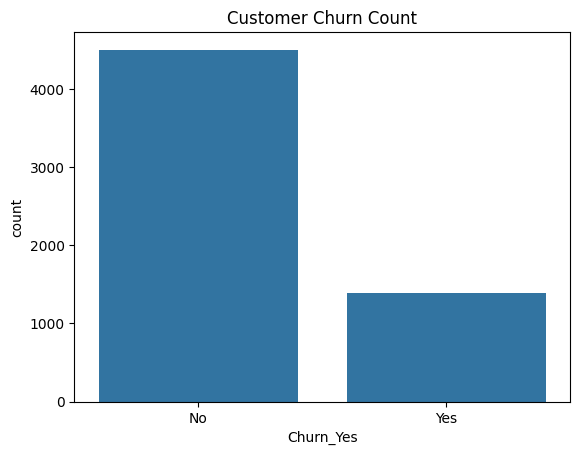

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# If 'Churn_Yes' exists, use it for visualization
if 'Churn_Yes' in df.columns:
    sns.countplot(data=df, x='Churn_Yes')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Convert 0/1 to 'No'/'Yes'
    plt.title("Customer Churn Count")
    plt.show()
else:
    print("Column 'Churn_Yes' not found in the dataframe.")



In [23]:
# Check if df is defined
try:
    df
except NameError:
    print("DataFrame 'df' is not defined. Please load your dataset first.")


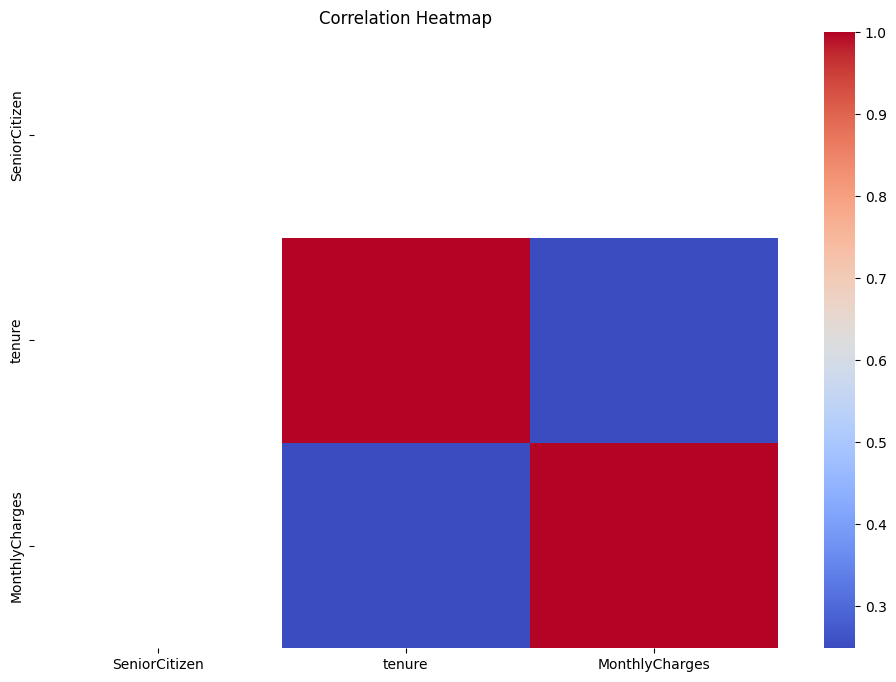

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
num_cols = df.select_dtypes(include=['number'])

# Further reduce if too many columns
if num_cols.shape[1] > 50:  # Adjust this threshold as needed
    num_cols = num_cols.iloc[:, :50]  # Take only the first 50 numerical columns

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(num_cols.corr(), annot=False, cmap='coolwarm')  # Set annot=False for speed
plt.title("Correlation Heatmap")
plt.show()



In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample 1000 values to speed up the boxplot (adjust as needed)
sampled_data = df['TotalCharges'].sample(n=1000, random_state=42)

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=sampled_data)
plt.title("Boxplot of TotalCharges (Sampled)")
plt.show()


KeyError: 'TotalCharges'

In [ ]:
sns.pairplot(df.sample(500))  # Sample 500 rows to avoid high computation time
plt.show()


## Model selection and training :

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select numerical features
num_features = df.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_features]), columns=num_features)

# Preserve categorical columns if needed
df_scaled['Churn'] = df['Churn'].values  # Ensure target variable is added back

# Define features (X) and target (y)
X = df_scaled.drop(columns=['Churn'])  # Features
y = df_scaled['Churn']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check output
X_train.shape, X_test


((5634, 3),
       SeniorCitizen    tenure  MonthlyCharges
 185       -0.439916 -1.277445       -1.328164
 2715      -0.439916  0.351370       -1.313208
 3825      -0.439916  0.799294       -1.509300
 1807      -0.439916 -1.277445        0.385148
 132       -0.439916  1.410099       -0.472339
 ...             ...       ...             ...
 6366      -0.439916  1.287938        0.117599
 315       -0.439916  0.758574        1.505199
 2439      -0.439916 -0.625919       -1.491021
 5002      -0.439916  1.491540       -0.691696
 1161      -0.439916 -1.277445       -1.110469
 
 [1409 rows x 3 columns])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.808374733853797


Accuracy: 0.808374733853797
              precision    recall  f1-score   support

          No       0.83      0.92      0.88      1036
         Yes       0.70      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



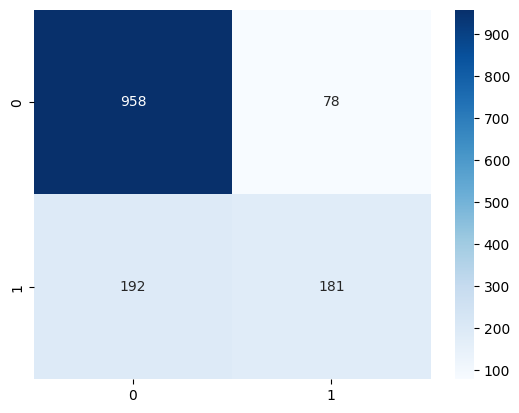

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.show()


In [ ]:
print(df.head())  # Show first 5 rows
print(df.info())  # Show column types and missing values


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("churn.csv")

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values
df = df.dropna()

# Convert 'Churn' column from 'Yes'/'No' to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Extract the target variable
y = df['Churn']

# Extract features (drop customerID and target column)
X = df.drop(columns=['customerID', 'Churn'])

# Align target variable to match feature rows
y = y.loc[X.index]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data preprocessing successful!")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")





Data preprocessing successful!
X_train shape: (5625, 19), X_test shape: (1407, 19)
y_train shape: (5625,), y_test shape: (1407,)


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# List of categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Preprocessing for categorical data: impute missing values and one-hot encode
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
            ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical variables
        ]), categorical_cols)
    ])

# Create a pipeline that first applies preprocessing, then Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression
])

# Define the parameter grid for hyperparameter tuning
param_grid = {'classifier__C': [0.1, 1, 10, 100]}  # Logistic Regression's regularization parameter 'C'

# Initialize and perform GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters found
print(f'Best Parameters: {grid.best_params_}')



Best Parameters: {'classifier__C': 1}


## Save The Model

In [ ]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

In [ ]:
# Save the Logistic Regression model (if you used GridSearchCV or pipeline)
joblib.dump(grid.best_estimator_, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

## Model Evaluation

Logistic Regression Model Evaluation:
Accuracy: 0.7818
Precision: 0.6000
Recall: 0.5374
F1-Score: 0.5670
ROC-AUC: 0.7039
Confusion Matrix:
[[899 134]
 [173 201]]


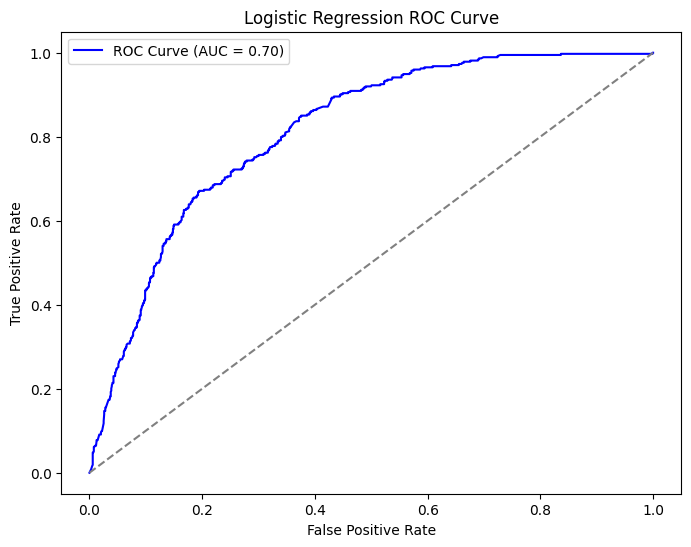

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Predict on test data
y_pred_logistic = grid.predict(X_test)  # grid is the GridSearchCV object for Logistic Regression

# Evaluate using multiple metrics
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Print results
print(f"Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Model Evaluation for XGBoost model

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a transformer for categorical columns (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Apply one-hot encoding
])

# Preprocessing pipeline for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),  # Scale numerical columns
        ('cat', categorical_transformer, categorical_columns)  # Apply transformer to categorical columns
    ]
)

# Apply the preprocessing to the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Now train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_processed, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_processed)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 76.83%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



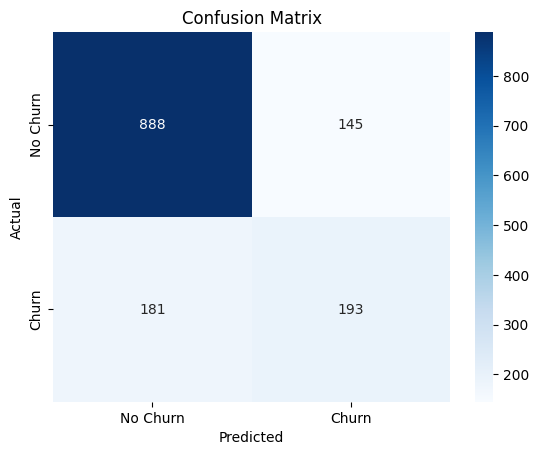

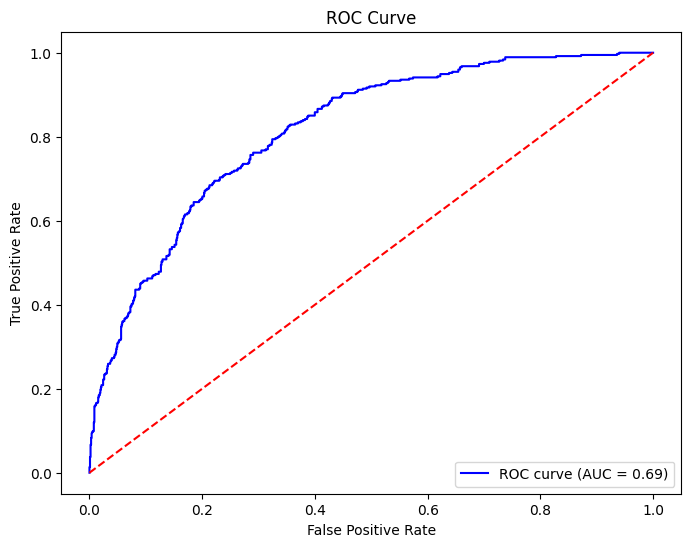

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate using accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix (to see true positives, false positives, etc.)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Curve
roc_auc = roc_auc_score(y_test, y_pred_xgb)
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test_processed)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



##Creatin Flask Web API

In [11]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [12]:
import streamlit as st
import joblib
import pandas as pd

# Load the trained model (ensure you're loading the correct model file)
model = joblib.load('logistic_regression_model.pkl')  # Change to your model if needed

# Streamlit UI components
st.title('Customer Churn Prediction')
st.write("Enter the details to predict whether the customer will churn or not:")

# Gather input from user in Streamlit form
gender = st.selectbox('Gender', ['Male', 'Female'])
partner = st.selectbox('Partner', ['Yes', 'No'])
dependents = st.selectbox('Dependents', ['Yes', 'No'])
tenure = st.slider('Tenure (Number of months)', 0, 72, 12)  # Adjust based on your dataset
phone_service = st.selectbox('Phone Service', ['Yes', 'No'])
multiple_lines = st.selectbox('Multiple Lines', ['Yes', 'No', 'No phone service'])
internet_service = st.selectbox('Internet Service', ['DSL', 'Fiber optic', 'No internet service'])
online_security = st.selectbox('Online Security', ['Yes', 'No', 'No internet service'])
online_backup = st.selectbox('Online Backup', ['Yes', 'No', 'No internet service'])
device_protection = st.selectbox('Device Protection', ['Yes', 'No', 'No internet service'])
tech_support = st.selectbox('Tech Support', ['Yes', 'No', 'No internet service'])
streaming_tv = st.selectbox('Streaming TV', ['Yes', 'No', 'No internet service'])
streaming_movies = st.selectbox('Streaming Movies', ['Yes', 'No', 'No internet service'])
contract = st.selectbox('Contract', ['Month-to-month', 'One year', 'Two year'])
paperless_billing = st.selectbox('Paperless Billing', ['Yes', 'No'])
payment_method = st.selectbox('Payment Method', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
monthly_charges = st.slider('Monthly Charges', 0.0, 200.0, 50.0)  # Adjust based on dataset
total_charges = st.slider('Total Charges', 0.0, 10000.0, 1000.0)  # Adjust based on dataset

# Prepare input data as a DataFrame
input_data = pd.DataFrame({
    'gender': [gender],
    'partner': [partner],
    'dependents': [dependents],
    'tenure': [tenure],
    'PhoneService': [phone_service],
    'MultipleLines': [multiple_lines],
    'InternetService': [internet_service],
    'OnlineSecurity': [online_security],
    'OnlineBackup': [online_backup],
    'DeviceProtection': [device_protection],
    'TechSupport': [tech_support],
    'StreamingTV': [streaming_tv],
    'StreamingMovies': [streaming_movies],
    'Contract': [contract],
    'PaperlessBilling': [paperless_billing],
    'PaymentMethod': [payment_method],
    'MonthlyCharges': [monthly_charges],
    'TotalCharges': [total_charges]
})

# You may need to preprocess this data to ensure it aligns with the model's expectations
# If categorical variables were one-hot encoded during model training, you need to do the same preprocessing here
# Example: encode categorical variables if necessary
input_data_encoded = input_data.copy()

# Example of encoding categorical variables - update based on your actual encoding method
input_data_encoded['gender'] = input_data_encoded['gender'].map({'Male': 0, 'Female': 1})
input_data_encoded['partner'] = input_data_encoded['partner'].map({'Yes': 1, 'No': 0})
input_data_encoded['dependents'] = input_data_encoded['dependents'].map({'Yes': 1, 'No': 0})
input_data_encoded['PhoneService'] = input_data_encoded['PhoneService'].map({'Yes': 1, 'No': 0})
# Repeat for other categorical variables as needed...

# Check for missing values
input_data_encoded = input_data_encoded.fillna(0)  # If you had missing values

# Make the prediction
prediction = model.predict(input_data_encoded)
prediction_proba = model.predict_proba(input_data_encoded)

# Display results
if prediction[0] == 1:
    st.write('Prediction: The customer will churn.')
else:
    st.write('Prediction: The customer will not churn.')

st.write(f"Prediction Probability: {prediction_proba[0][1]:.2f}")



FileNotFoundError: [Errno 2] No such file or directory: 'logistic_regression_model.pkl'

In [1]:
# Save the Streamlit script to a .py file
code = """
import streamlit as st

st.title('Customer Churn Prediction')
st.write("Enter the details to predict whether the customer will churn or not:")
"""

with open("/content/app.py", "w") as f:
    f.write(code)


In [2]:
# List files to verify 'app.py' exists
!ls /content


app.py	sample_data


In [3]:
!streamlit run /content/app.py


/bin/bash: line 1: streamlit: command not found


In [4]:
!pip install pyngrok


In [9]:
from pyngrok import ngrok

# Set your ngrok auth token (replace 'your_auth_token_here' with the actual token)
ngrok.set_auth_token("2tGc8X9HNdbcVXnRdljW7tQX3hK_5aybyvEUgDJt1vwxD91T")

# Run your server (e.g., Streamlit)
!streamlit run your_script.py &

# Create a tunnel for the Streamlit app
public_url = ngrok.connect(8501)

# Print the public URL
print(f"Your Streamlit app is live at: {public_url}")



/bin/bash: line 1: streamlit: command not found
Your Streamlit app is live at: NgrokTunnel: "https://4c67-35-201-212-178.ngrok-free.app" -> "http://localhost:8501"


In [10]:
!streamlit run your_script.py


/bin/bash: line 1: streamlit: command not found
